   # BHARATH INTERN

# TASK - 01

# **SMS SPAM- HAM CLASSIFIER**





### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.naive_bayes import GaussianNB as gm
from sklearn.naive_bayes import MultinomialNB as mm
from sklearn.naive_bayes import BernoulliNB as bm
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import files

# Upload the Kaggle API key
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset


  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 65.4MB/s]


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile


dataset = '/content/sms-spam-collection-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
846,ham,My stomach has been thru so much trauma I swea...,NaN,NaN,NaN
2762,ham,ARR birthday today:) i wish him to get more os...,NaN,NaN,NaN
1117,spam,"449050000301 You have won a å£2,000 price! To ...",NaN,NaN,NaN
808,ham,I am taking half day leave bec i am not well,NaN,NaN,NaN
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN


## 1. DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1841,ham,I am in your office na.
2430,ham,How was txting and driving
5298,ham,I.ll hand her my phone to chat wit u
2948,ham,at bruce b downs &amp; fletcher now
4958,ham,"What i mean was i left too early to check, cos..."


In [9]:
#RENAMING THE COLUMN NAMES
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)
df.sample(5)

,target,sms
5141,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...
1497,ham,I'm putting it on now. It should be ready for ...
1552,ham,U too...
2422,ham,A bloo bloo bloo I'll miss the first bowl
5400,ham,HARD BUT TRUE: How much you show &amp; expres...


In [10]:
# SETTING 0-HAM 1-SPAM SMS USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,sms
1149,0,Not a drop in the tank
4322,0,Aight well keep me informed
1143,0,And is there a way you can send shade's stuff ...
1638,0,Great comedy..cant stop laughing da:)
3794,0,Also remember the beads don't come off. Ever.


In [11]:
#Check missing values
df.isnull().sum()

target    0
sms       0
dtype: int64

In [12]:
#Check duplicate values (rows)
df.duplicated().sum()

403

In [13]:
# Remove duplicated values by keeping first occurence only
df=df.drop_duplicates(keep='first')


In [14]:
df.duplicated().sum() # all duplicate rows removed

0

## 2. Exploratory Data Analysis(EDA)

In [15]:
df['target'].value_counts()
# 0- ham 1- spam

0    4516
1     653
Name: target, dtype: int64

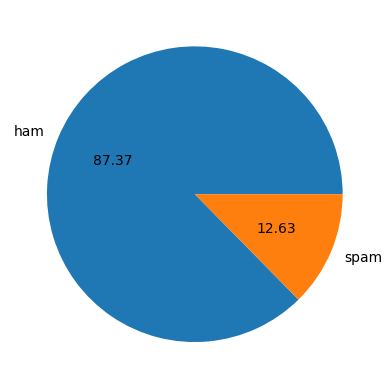

In [16]:
# to visualize nicely target column
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['char_count']=df['sms'].apply(len)

In [19]:
df['words_count']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['sent_count']=df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head(5)

,target,sms,char_count,words_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.describe()

,target,char_count,words_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# HAM
df[df['target']==0][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# SPAM
df[df['target']==1][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
# plot histogram for both category

<Axes: xlabel='char_count', ylabel='Count'>

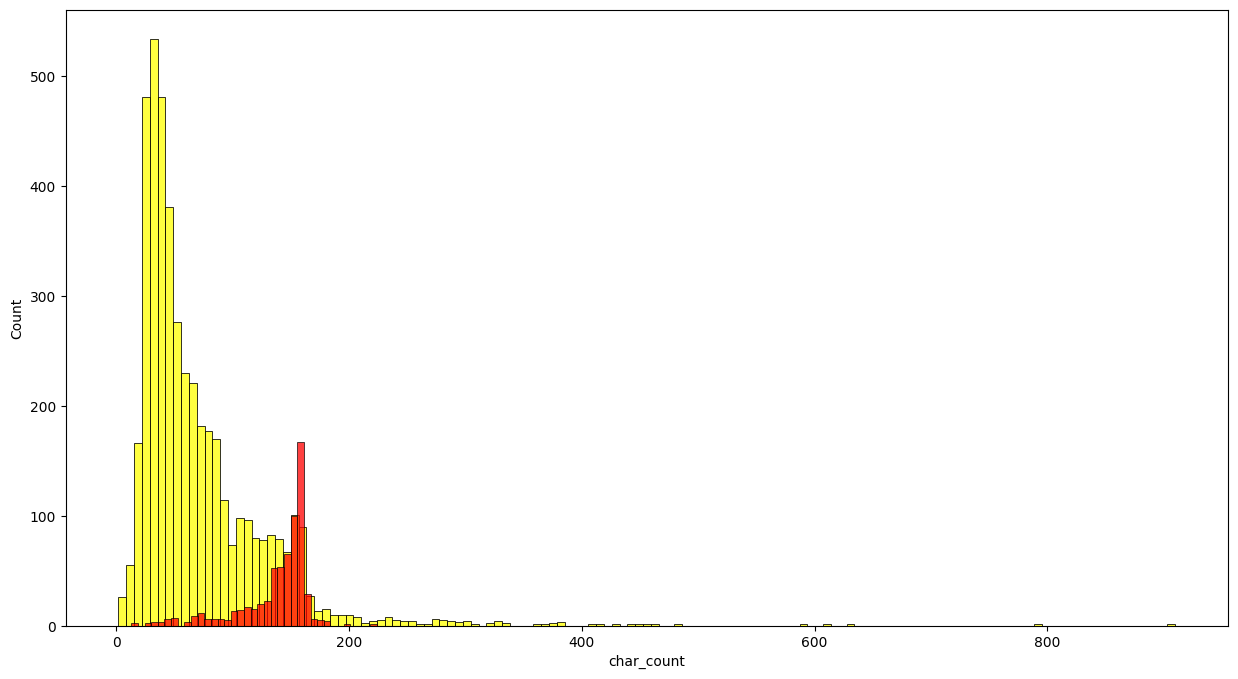

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['char_count'],color='yellow')
sns.histplot(df[df['target']==1]['char_count'],color='red')


<Axes: xlabel='words_count', ylabel='Count'>

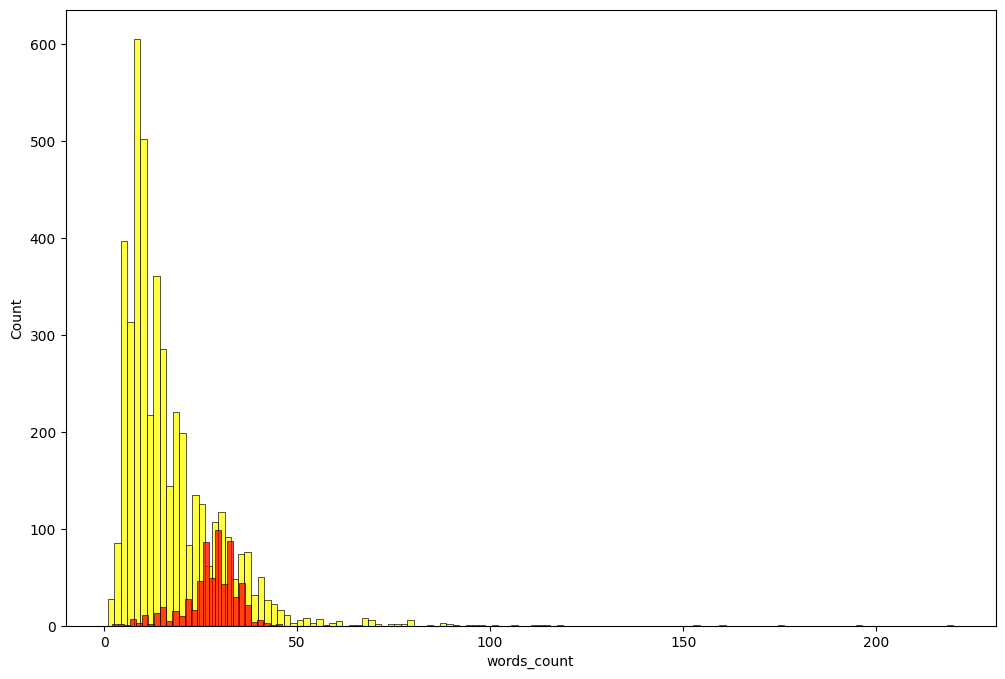

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['words_count'],color='yellow')
sns.histplot(df[df['target']==1]['words_count'],color='red')

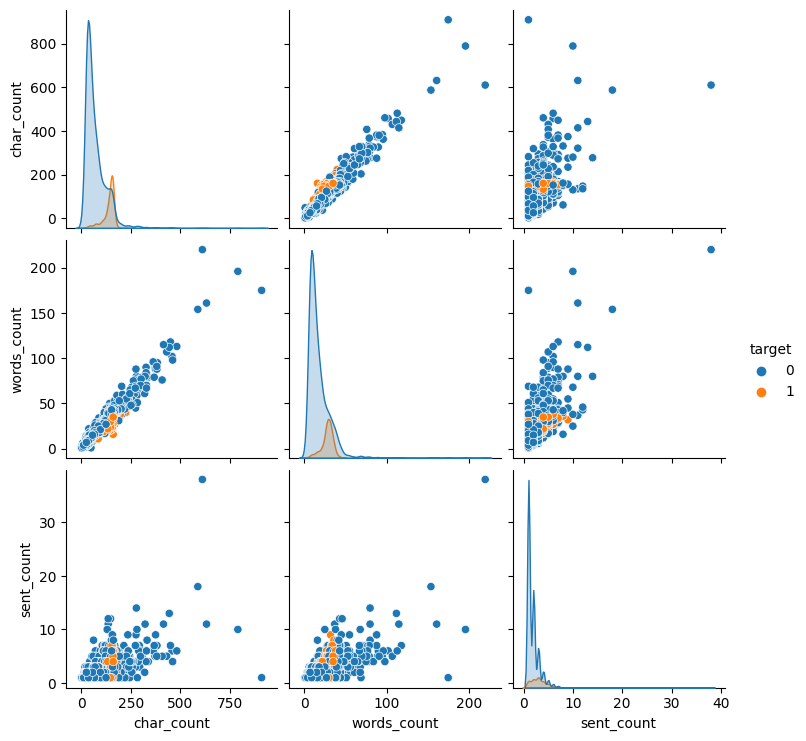

In [28]:
sns.axisgrid.pairplot(df,hue='target')

<Axes: >

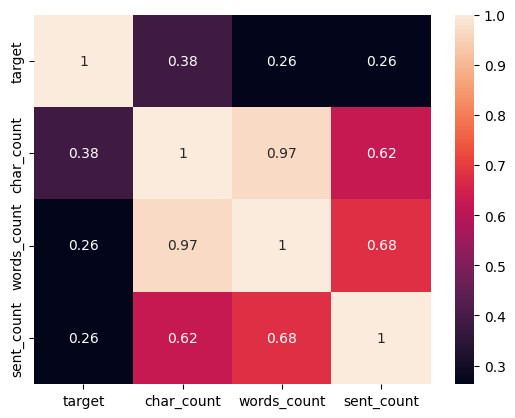

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)


## 3. DATA PREPROCESSING

##### * Lower case data
##### * Tokenization
##### * Removing special characters
##### * Removin stop words and punctautions
##### * Stemming



In [30]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def transform_sms(sms):
    sms=sms.lower()
    sms=nltk.word_tokenize(sms)

    y=[]
    for i in sms:
        if i.isalnum():
            y.append(i)
    sms = y[:]
    y.clear()

    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    sms=y[:]
    y.clear()

    for i in sms:
        y.append(ps.stem(i))

    return " ".join(y)


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
transform_sms("TypeError: 'TfidfVectorizer' object is not callable")

'typeerror object callabl'

In [33]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [34]:
df['transformed_sms']=df['sms'].apply(transform_sms)

In [35]:
df.sample(5)

,target,sms,char_count,words_count,sent_count,transformed_sms
991,0,Hi im having the most relaxing time ever! we h...,142,34,4,hi im relax time ever get 7am everi day parti ...
3543,0,Lol ok ill try to send. Be warned Sprint is de...,84,20,3,lol ok ill tri send warn sprint dead slow prol...
4425,0,Was it something u ate?,23,6,1,someth u ate
4211,1,Missed call alert. These numbers called but le...,72,13,3,miss call alert number call left messag 070080...
4694,1,URGENT! Your Mobile No 07808726822 was awarded...,155,28,4,urgent mobil 07808726822 award bonu caller pri...


In [36]:
#getting most frequent used words in spam mails
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [37]:
span_wc=wc.generate(df[df['target']==1]['transformed_sms'].str.cat(sep=" "))

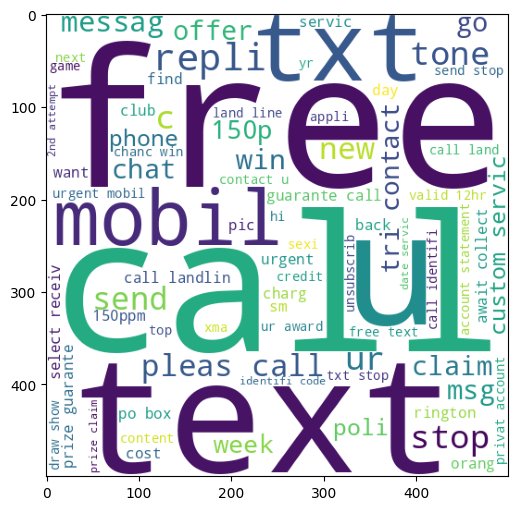

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [39]:
ham_wc=wc.generate(df[df['target']==0]['transformed_sms'].str.cat(sep=" "))

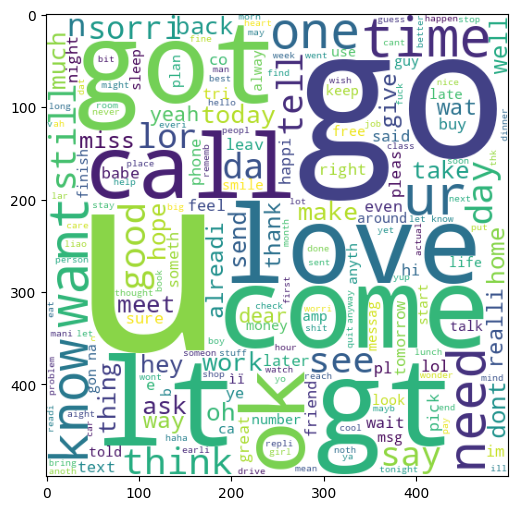

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
# to get the top 30 most used words in spam mails
spam_corpus=[]
for i in df[df['target']==1]['transformed_sms'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

In [43]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

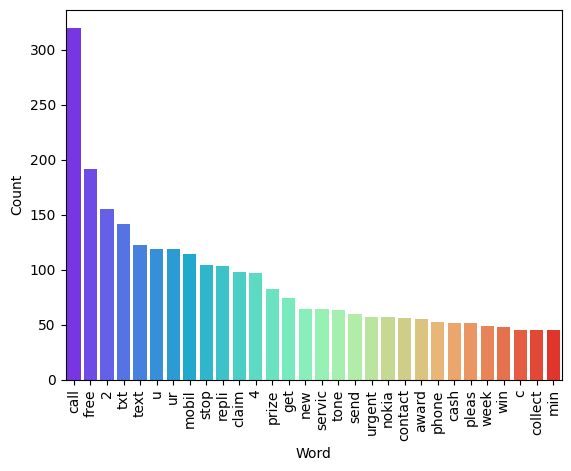

In [44]:
from collections import Counter
# Assuming spam_corpus is a list of words or tokens
spam_counter = Counter(spam_corpus)
top_30_common = spam_counter.most_common(30)

# Convert the counter result to a DataFrame
df_common = pd.DataFrame(top_30_common, columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=df_common, palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()


In [45]:
# to get the top 30 most used words in ham mails
ham_corpus=[]
for i in df[df['target']==0]['transformed_sms'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

35404

In [47]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

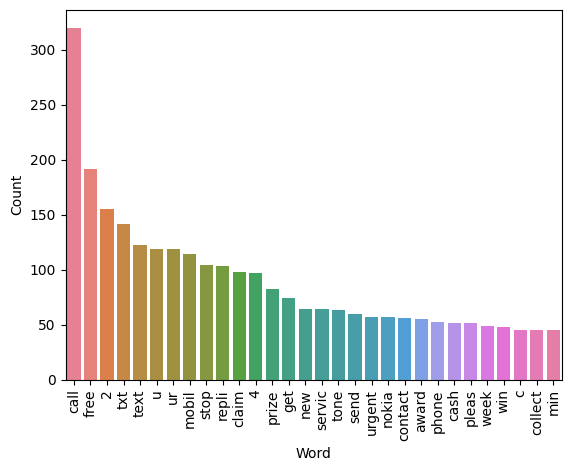

In [48]:
# Assuming spam_corpus is a list of words or tokens
spam_counter = Counter(spam_corpus)
top_30_common = spam_counter.most_common(30)

# Convert the counter result to a DataFrame
df_common = pd.DataFrame(top_30_common, columns=['Word', 'Count'])

# Plot using seaborn barplot
# Define a list of colors for each bar
colors = sns.color_palette('husl', n_colors=len(df_common))

sns.barplot(x='Word', y='Count', data=df_common, palette= colors)
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [49]:
# we are using naive baiyes classifier

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
x=tfidf.fit_transform(df['transformed_sms']).toarray()

In [52]:
x.shape

(5169, 3000)

In [53]:
y=df['target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gm=GaussianNB()
mm=MultinomialNB()
bm=BernoulliNB()

In [58]:
gm.fit(x_train,y_train)
y_pred1 = gm.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


In [59]:
mm.fit(x_train,y_train)
y_pred2 = mm.predict(x_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [60]:
bm.fit(x_train,y_train)
y_pred3 = bm.predict(x_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


In [61]:
# tfidf --> multinomialNB
#IMPROVEMENT
# max_feature=3000

In [62]:
# To generate the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(mm,open('model.pkl', 'wb'))